In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
car=pd.read_excel(r"C:\Users\Baskar\OneDrive\Desktop\Python for data science\DS1_C4_S9_Car_Data.xlsx")

In [3]:
car.columns

Index(['S. No.', 'Make', 'Model', 'Variant', 'Displacement', 'Cylinders',
       'Valves_Per_Cylinder', 'Fuel_Tank_Capacity_litre', 'Fuel_Type',
       'Height_mm', 'Length_mm', 'Width_mm', 'Body_Type', 'Doors',
       'City_Mileage_km_litre', 'Highway_Mileage_km_litre', 'Kerb_Weight',
       'Power', 'Torque', 'Seating_Capacity', 'Central_Locking',
       'Child_Safety_Locks', 'Hill_Assist', 'Drive_Modes',
       'High_Speed_Alert_System', 'ABS_(Anti-lock_Braking_System)',
       'Gross_Vehicle_Weight', 'Airbags', 'Door_Ajar_Warning',
       'Fasten_Seat_Belt_Warning'],
      dtype='object')

In [5]:
car.isnull().sum()
#counted the number of missing values.

S. No.                               0
Make                                75
Model                                0
Variant                              0
Displacement                        12
Cylinders                           66
Valves_Per_Cylinder                102
Fuel_Tank_Capacity_litre            69
Fuel_Type                            0
Height_mm                            1
Length_mm                            0
Width_mm                            12
Body_Type                            6
Doors                                4
City_Mileage_km_litre              555
Highway_Mileage_km_litre           800
Kerb_Weight                        365
Power                                0
Torque                               2
Seating_Capacity                     6
Central_Locking                    149
Child_Safety_Locks                  75
Hill_Assist                        796
Drive_Modes                       1081
High_Speed_Alert_System           1068
ABS_(Anti-lock_Braking_Sy

In [9]:
car.dtypes

S. No.                              int64
Make                               object
Model                              object
Variant                            object
Displacement                      float64
Cylinders                         float64
Valves_Per_Cylinder               float64
Fuel_Tank_Capacity_litre          float64
Fuel_Type                          object
Height_mm                         float64
Length_mm                         float64
Width_mm                          float64
Body_Type                          object
Doors                             float64
City_Mileage_km_litre             float64
Highway_Mileage_km_litre          float64
Kerb_Weight                        object
Power                             float64
Torque                            float64
Seating_Capacity                  float64
Central_Locking                    object
Child_Safety_Locks                 object
Hill_Assist                        object
Drive_Modes                       

In [15]:
# Data preprocessing(null values,duplicates,missing value treatment and conversion of datatypes):
car['Height_mm'].fillna(car['Displacement'].mean(),inplace=True)
car['Make'].fillna(('Not available'),inplace=True)
car['Displacement'].fillna(car['Displacement'].mean(),inplace=True)
car['Cylinders'].fillna(car['Cylinders'].median(),inplace=True)
car['Valves_Per_Cylinder'].fillna(car['Valves_Per_Cylinder'].median(),inplace=True)  
car['Fuel_Tank_Capacity_litre'].fillna(car['Fuel_Tank_Capacity_litre'].median(),inplace=True)
car['Width_mm'].fillna(car['Width_mm'].median(),inplace=True)
car['Body_Type'].fillna(car['Body_Type'].mode()[0],inplace=True)
car['Doors'].fillna(car['Doors'].median(),inplace=True)
car['City_Mileage_km_litre'].fillna(car['City_Mileage_km_litre'].median(),inplace=True)
car['Highway_Mileage_km_litre'].fillna(car['Highway_Mileage_km_litre'].median(),inplace=True)
car['Kerb_Weight'].fillna(car['Kerb_Weight'].mode()[0],inplace=True)
car['Torque'].fillna(car['Torque'].median(),inplace=True)
car['Seating_Capacity'].fillna(car['Seating_Capacity'].median(),inplace=True)
car['Central_Locking'].fillna(car['Central_Locking'].mode()[0],inplace=True)
car['Child_Safety_Locks'].fillna(car['Child_Safety_Locks'].mode()[0],inplace=True)
car['Hill_Assist'].fillna(car['Hill_Assist'].mode()[0],inplace=True)
car['Drive_Modes'].fillna(car['Drive_Modes'].mode()[0],inplace=True)
car['High_Speed_Alert_System'].fillna(car['High_Speed_Alert_System'].mode()[0],inplace=True)
car['ABS_(Anti-lock_Braking_System)'].fillna(car['ABS_(Anti-lock_Braking_System)'].mode()[0],inplace=True)
car['Gross_Vehicle_Weight'].fillna(car['Gross_Vehicle_Weight'].mode()[0],inplace=True)
car['Airbags'].fillna(car['Airbags'].mode()[0],inplace=True)
car['Door_Ajar_Warning'].fillna(car['Door_Ajar_Warning'].mode()[0],inplace=True)
car['Fasten_Seat_Belt_Warning'].fillna(car['Fasten_Seat_Belt_Warning'].mode()[0],inplace=True)

#replaced the missing values with mode ,mean,median.

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
car.isnull().sum()
#After replacing there is no missing values.

S. No.                            0
Make                              0
Model                             0
Variant                           0
Displacement                      0
Cylinders                         0
Valves_Per_Cylinder               0
Fuel_Tank_Capacity_litre          0
Fuel_Type                         0
Height_mm                         0
Length_mm                         0
Width_mm                          0
Body_Type                         0
Doors                             0
City_Mileage_km_litre             0
Highway_Mileage_km_litre          0
Kerb_Weight                       0
Power                             0
Torque                            0
Seating_Capacity                  0
Central_Locking                   0
Child_Safety_Locks                0
Hill_Assist                       0
Drive_Modes                       0
High_Speed_Alert_System           0
ABS_(Anti-lock_Braking_System)    0
Gross_Vehicle_Weight              0
Airbags                     

In [13]:
#Market senmentation analysis:
trends=car.groupby(['Make','Model'])['Body_Type'].count()
trends

Make          Model            
Aston Martin  Db 11                1
              Rapide               1
              Vantage              1
Audi          A3                   4
              A3 Cabriolet         1
                                  ..
Volvo         V40 Cross Country    2
              V90 Cross Country    1
              Xc40                 3
              Xc60                 1
              Xc90                 5
Name: Body_Type, Length: 263, dtype: int64

In [21]:
#Task-1 another method(Display the top 5 body type using horizontal bar chart:)(correct method):
group=car.groupby('Body_Type')['Body_Type'].count()[::-1]
group
sorted_group=group.sort_values(ascending=False)[:5]
sorted_group

Body_Type
SUV          453
Sedan        333
Hatchback    316
Coupe         41
MUV           39
Name: Body_Type, dtype: int64

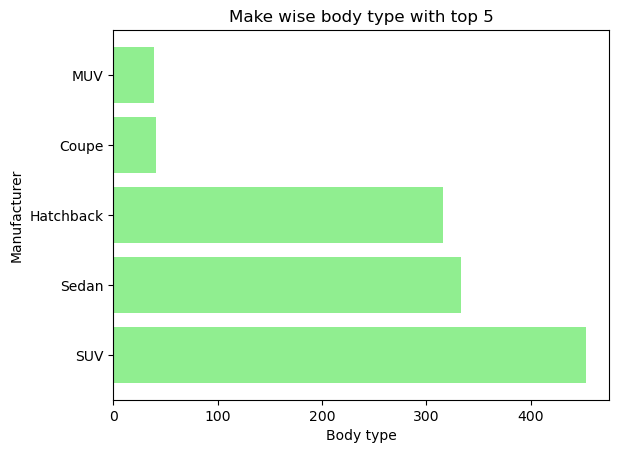

In [23]:
plt.barh(sorted_group.index,sorted_group.values,color='lightgreen')
plt.title('Make wise body type with top 5')
plt.xlabel('Body type')
plt.ylabel('Manufacturer')
plt.show()
#Interpretation:
#I has displayed the horizontal bar chart based on 'Make' after sorting the top 5 body type using groupby count() function.

In [25]:
#Task-1  Display the top 5 body type using horizontal bar chart:
sort_car=car.sort_values(by='Body_Type',ascending=False)[:5]
sort_car

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
275,275,Mini,John Cooper Works,Hatch,1998.0,4.0,4.0,44.0,Petrol,1414.0,...,Yes,Yes,Yes,"Eco, Sport",Yes,Yes,1710 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
807,807,Bmw,Z4 Roadster,Sdrive 20I,1998.0,4.0,4.0,52.0,Petrol,1304.0,...,Yes,Yes,Yes,"Eco, Sport, Normal, Comfort",Yes,Yes,1740 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
808,808,Bmw,Z4 Roadster,M 40I,2998.0,6.0,4.0,52.0,Petrol,1304.0,...,Yes,Yes,Yes,"Normal, Comfort, Eco, Sport",Yes,Yes,1860 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
332,332,Maserati,Quattroporte,Granlusso,2987.0,6.0,4.0,70.0,Diesel,1481.0,...,Yes,Yes,Yes,Normal,Yes,Yes,2510 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
356,356,Bugatti,Chiron,Sport,7993.0,16.0,4.0,46.0,Petrol,1212.0,...,Yes,Yes,Yes,"Normal, Sport",Yes,Yes,2510 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes


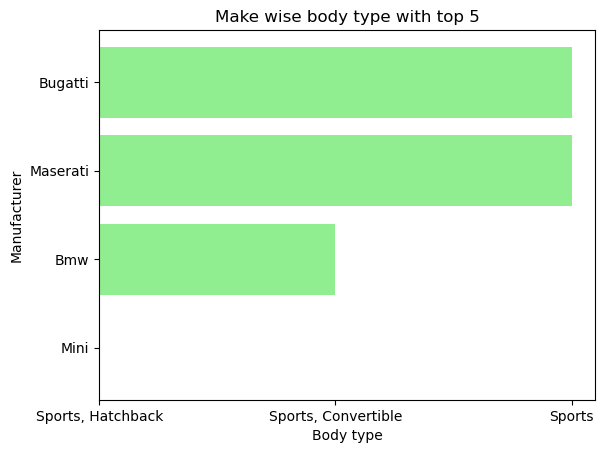

In [27]:
plt.barh(sort_car['Make'],sort_car['Body_Type'],color='lightgreen')
plt.title('Make wise body type with top 5')
plt.xlabel('Body type')
plt.ylabel('Manufacturer')
plt.show()

#Interpretation:
#I has displayed the horizontal bar chart based on 'Make' after sorting the top 5 body type.

In [29]:
#Task-2 List the details of car based on the driving conditions and how many cars have all the above mentioned features:
car.groupby(['Drive_Modes','Model'])['Drive_Modes'].count()
#Interpretation:
#Under this task I has used groupby to count the Drive modes along with Model of car.

Drive_Modes                  Model                
Comfort, Eco, Sport          Discovery Sport          2
                             Kona Electric            1
                             Xc40                     1
Comfort, Eco, Sport, Normal  A6                       2
                             Octavia                  1
                                                     ..
Sport                        Mercedes-Benz C-Class    6
                             Tiago                    2
                             X7                       2
Sport, Normal, Comfort       Mercedes-Benz Gle        1
Sport, Normal, Eco           Zs Ev                    1
Name: Drive_Modes, Length: 286, dtype: int64

In [31]:
#Fuel Efficiency Analysis
#Task-3 Top 10 car manufacturer based on city mileage:

fetched=car.groupby('Make')['City_Mileage_km_litre'].count()
sorted=fetched.sort_values(ascending=False)[:10]
sorted

#Interpretation:
#Under this task I used groupby to fetch the record and sorted into decending and then taken top 10 record.

Make
Maruti Suzuki    149
Hyundai          130
Mahindra         119
Tata             100
Toyota            82
Not available     75
Honda             64
Skoda             43
Ford              43
Bmw               37
Name: City_Mileage_km_litre, dtype: int64

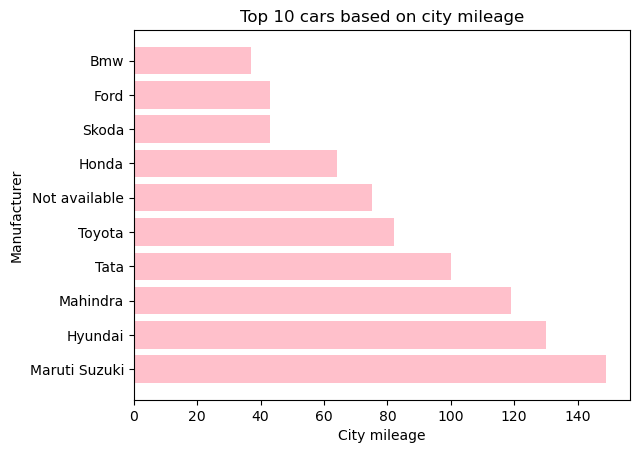

In [33]:
plt.barh(sorted.index,sorted.values,color='pink')
plt.title('Top 10 cars based on city mileage')
plt.xlabel('City mileage')
plt.ylabel('Manufacturer')
plt.show()
#I has displayed using horizontal bar chart.

In [35]:
#finding chances of outliers using kurtosis:
from scipy.stats import kurtosis
print('City_Mileage_km_litre outliers:',kurtosis(car['City_Mileage_km_litre']))

#Under this city_mileage there is no outliers.

City_Mileage_km_litre outliers: 101.81653472822339


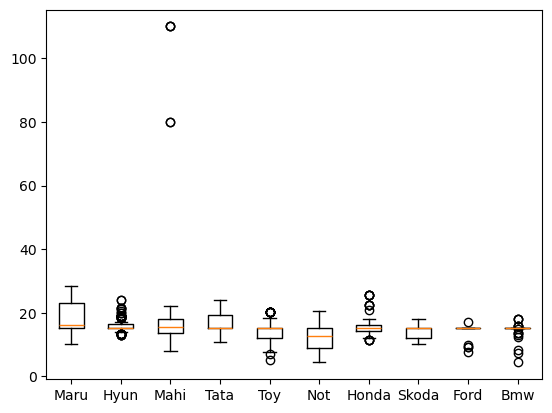

In [37]:
#Finding the outlier using boxplot:
make1=car[car['Make']=='Maruti Suzuki']
make2=car[car['Make']=='Hyundai']
make3=car[car['Make']=='Mahindra']
make4=car[car['Make']=='Tata']
make5=car[car['Make']=='Toyota']
make6=car[car['Make']=='Not available']
make7=car[car['Make']=='Honda']
make8=car[car['Make']=='Skoda']
make9=car[car['Make']=='Ford']
make10=car[car['Make']=='Bmw']
plt.boxplot([make1['City_Mileage_km_litre'],make2['City_Mileage_km_litre'],make3['City_Mileage_km_litre'],make4['City_Mileage_km_litre'],make5['City_Mileage_km_litre'],make6['City_Mileage_km_litre'],make7['City_Mileage_km_litre'],make8['City_Mileage_km_litre'],make9['City_Mileage_km_litre'],make10['City_Mileage_km_litre']],labels=['Maru','Hyun','Mahi','Tata','Toy','Not','Honda','Skoda','Ford','Bmw']) 
plt.show()

#Interpretation:
# Yes,under this task there is an outlier in the Hyundai,Mahindra,Toyota,Honda,Ford and Bmw manufacturer based on city mileage.
#The reason for the outliers is because of some errors in the dataset.

In [41]:
#Task-4  Identify the top 20 car manufacturer based on city mileage and display using horizontal bar chart:
non_electric=car.groupby('Make')['City_Mileage_km_litre'].mean()
sort_electric=non_electric.sort_values(ascending=False)[:20]
sort_electric

Make
Renault            19.384444
Mahindra           18.973866
Maruti Suzuki      18.854430
Datsun             18.684000
Tata               17.182900
Lexus              16.434000
Honda              16.118906
Fiat               16.056087
Hyundai            16.017000
Volkswagen         15.730000
Nissan             15.308966
Maruti Suzuki R    15.290000
Mg                 15.290000
Kia                15.290000
Bugatti            15.290000
Bajaj              15.290000
Land Rover         15.290000
Jeep               15.102143
Ford               14.751628
Bmw                14.596757
Name: City_Mileage_km_litre, dtype: float64

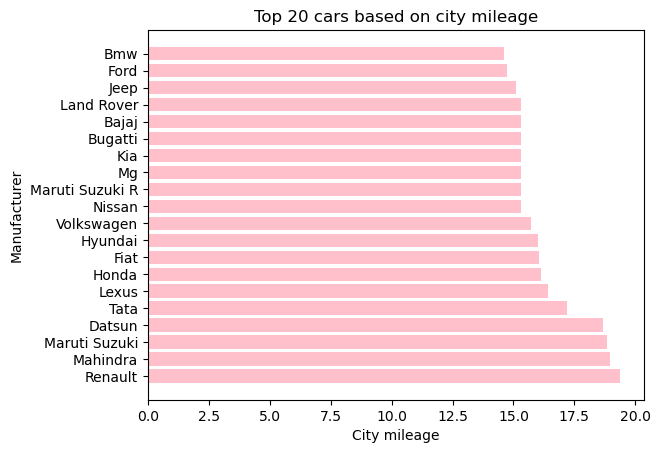

In [43]:
plt.barh(sort_electric.index,sort_electric.values,color='pink')
plt.title('Top 20 cars based on city mileage')
plt.xlabel('City mileage')
plt.ylabel('Manufacturer')
plt.show()

#Interpretation:
#Under this task I used horizontal bar chart to visualize the sorted details.

In [45]:
sort=car[car.Make=='Renault'][['Make','City_Mileage_km_litre']]
sort

,Make,City_Mileage_km_litre
12,Renault,25.17
13,Renault,25.17
14,Renault,25.17
15,Renault,25.17
16,Renault,25.17
17,Renault,25.17
18,Renault,25.17
19,Renault,25.17
20,Renault,25.17
21,Renault,25.17


In [55]:
#Task-5 Display the car mileage using pivot table 
pvt=pd.pivot_table(car,index=['Make'],values=['City_Mileage_km_litre'],aggfunc='mean')
result_Renault_mean=pvt.loc['Renault']
pvt=pd.pivot_table(car,index=['Make'],values=['City_Mileage_km_litre'],aggfunc='median')
result1_Renault_median=pvt.loc['Renault']

pvt=pd.pivot_table(car,index=['Make'],values=['Highway_Mileage_km_litre'],aggfunc='mean')
result_high_renault_mean=pvt.loc['Renault']
pvt=pd.pivot_table(car,index=['Make'],values=['Highway_Mileage_km_litre'],aggfunc='median')
result_renault_2=pvt.loc['Renault']

print('-------------------------------------------------------------------------------------------')

pvt=pd.pivot_table(car,index=['Make'],values=['City_Mileage_km_litre'],aggfunc='mean')
result_hyundai_mean=pvt.loc['Hyundai']
pvt=pd.pivot_table(car,index=['Make'],values=['City_Mileage_km_litre'],aggfunc='median')
result1_hyundai_median=pvt.loc['Hyundai']

pvt=pd.pivot_table(car,index=['Make'],values=['Highway_Mileage_km_litre'],aggfunc='mean')
result_high_hyundai_mean=pvt.loc['Hyundai']
pvt=pd.pivot_table(car,index=['Make'],values=['Highway_Mileage_km_litre'],aggfunc='median')
result_hyundai_2=pvt.loc['Hyundai']

print('-------------------------------------------------------------------------------------------')

pvt=pd.pivot_table(car,index=['Make'],values=['City_Mileage_km_litre'],aggfunc='mean')
result_mahindra_mean=pvt.loc['Mahindra']
pvt=pd.pivot_table(car,index=['Make'],values=['City_Mileage_km_litre'],aggfunc='median')
result1_mahindra_median=pvt.loc['Mahindra']

pvt=pd.pivot_table(car,index=['Make'],values=['Highway_Mileage_km_litre'],aggfunc='mean')
result_high_mahindra_mean=pvt.loc['Mahindra']
pvt=pd.pivot_table(car,index=['Make'],values=['Highway_Mileage_km_litre'],aggfunc='median')
result_mahindra_2=pvt.loc['Mahindra']

print('-------------------------------------------------------------------------------------------')

pvt=pd.pivot_table(car,index=['Make'],values=['City_Mileage_km_litre'],aggfunc='mean')
result_skoda_mean=pvt.loc['Skoda']
pvt=pd.pivot_table(car,index=['Make'],values=['City_Mileage_km_litre'],aggfunc='median')
result1_skoda_median=pvt.loc['Skoda']

pvt=pd.pivot_table(car,index=['Make'],values=['Highway_Mileage_km_litre'],aggfunc='mean')
result_high_skoda_mean=pvt.loc['Skoda']
pvt=pd.pivot_table(car,index=['Make'],values=['Highway_Mileage_km_litre'],aggfunc='median')
result_skoda_2=pvt.loc['Skoda']

print('Renault:')
print(result_Renault_mean)
print(result1_Renault_median)
print(result_high_renault_mean)
print(result_renault_2)
print('-----------------------------------')
print('Hyundai:')
print(result_hyundai_mean)
print(result1_hyundai_median)
print(result_high_hyundai_mean)
print(result_hyundai_2)
print('-----------------------------------')
print('Mahindra:')
print(result_mahindra_mean)
print(result1_mahindra_median)
print(result_high_mahindra_mean)
print(result_mahindra_2)
print('-----------------------------------')
print('Skoda:')
print(result_skoda_mean)
print(result1_skoda_median)
print(result_high_skoda_mean)
print(result_skoda_2)


#Interpretation:
#Under this task I has used pivot table to display the 'Make' and city mileage,highway mileage using aggregate function.

-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Renault:
City_Mileage_km_litre    19.384444
Name: Renault, dtype: float64
City_Mileage_km_litre    21.04
Name: Renault, dtype: float64
Highway_Mileage_km_litre    17.315
Name: Renault, dtype: float64
Highway_Mileage_km_litre    17.19
Name: Renault, dtype: float64
-----------------------------------
Hyundai:
City_Mileage_km_litre    16.017
Name: Hyundai, dtype: float64
City_Mileage_km_litre    15.29
Name: Hyundai, dtype: float64
Highway_Mileage_km_litre    17.538231
Name: Hyundai, dtype: float64
Highway_Mileage_km_litre    17.19
Name: Hyundai, dtype: float64
-----------------------------------
Mahindra:
City_Mileage_km_litre    18.973866
Name: Mahindra, dtype: float64
City_Mileage_km_litre    15.5
Name: Mahindra, dt

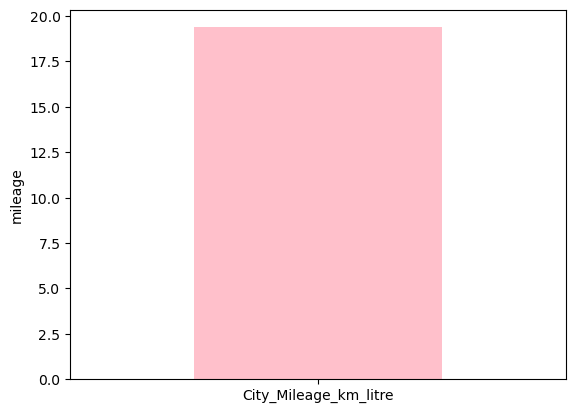

In [91]:
#Task-6  Visualize using staked column chart:
result_Renault_mean.plot(x='Renault',kind='bar',color='pink',stacked=False)
plt.ylabel('mileage')
plt.xticks(rotation=0)
plt.show()

#Interpretation
#Under this task I has displayed the staked column chart.
#Displayed the city mileage using mean.

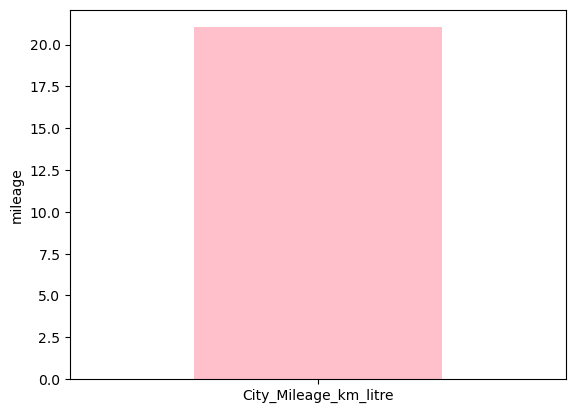

In [89]:
result1_Renault_median.plot(x='Renault',kind='bar',color='pink',stacked=False)
plt.ylabel('mileage')
plt.xticks(rotation=0)
plt.show()

#Displayed the city mileage using median.

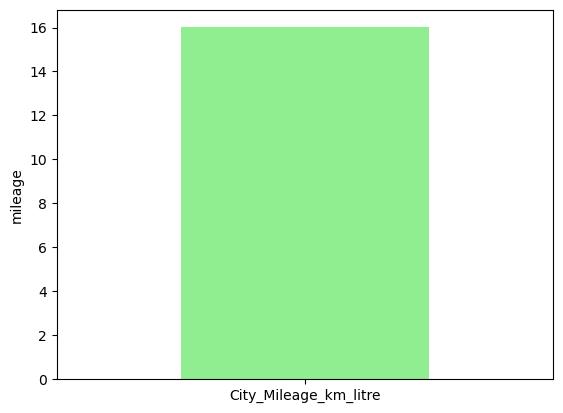

In [87]:
result_hyundai_mean.plot(x='Hyundai',kind='bar',color='lightgreen',stacked=False)
plt.ylabel('mileage')
plt.xticks(rotation=0)
plt.show()

#Interpretation
#Displayed the city mileage using mean.

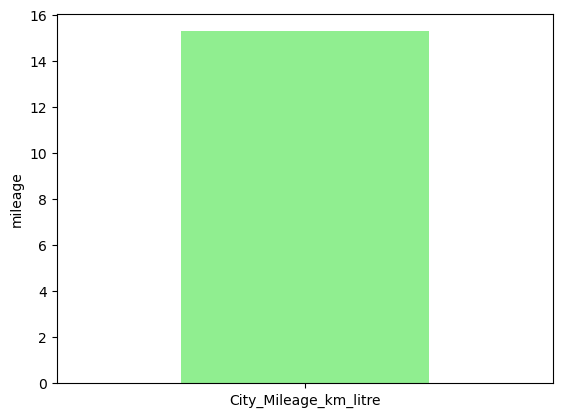

In [85]:
result1_hyundai_median.plot(x='Hyundai',kind='bar',color='lightgreen',stacked=False)
plt.ylabel('mileage')
plt.xticks(rotation=0)
plt.show()
#Displayed the city mileage using median.

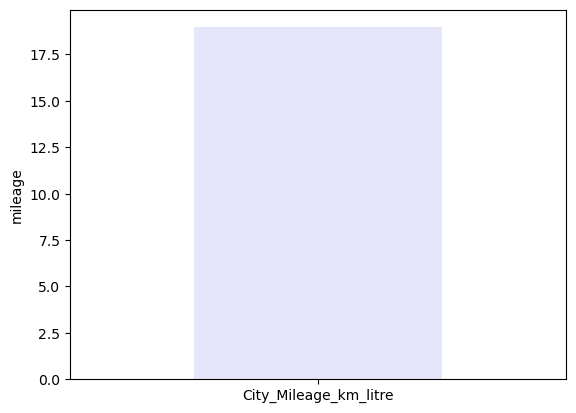

In [83]:
result_mahindra_mean.plot(x='Mahindra',kind='bar',color='lavender',stacked=False)
plt.ylabel('mileage')
plt.xticks(rotation=0)
plt.show()

#Interpretation
#Displayed the city mileage using mean.

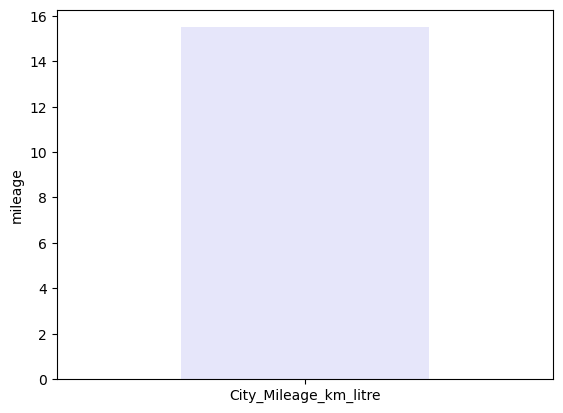

In [81]:
result1_mahindra_median.plot(x='Mahindra',kind='bar',color='lavender',stacked=False)
plt.ylabel('mileage')
plt.xticks(rotation=0)
plt.show()
#Displayed the city mileage using median.

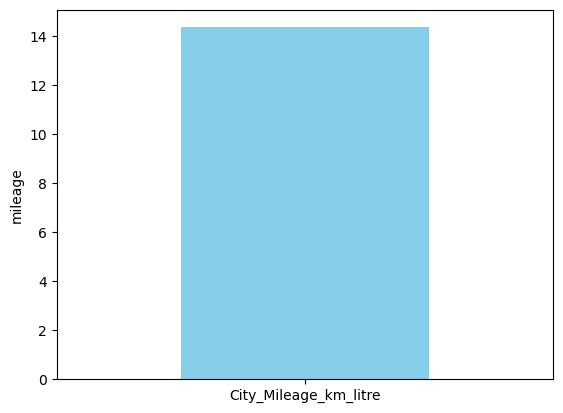

In [79]:
result_skoda_mean.plot(x='Skoda',kind='bar',color='skyblue',stacked=False)
plt.ylabel('mileage')
plt.xticks(rotation=0)
plt.show()

#Interpretation
#Displayed the city mileage using mean.

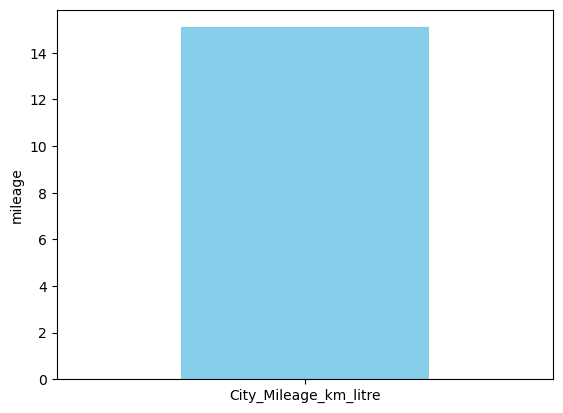

In [93]:
result1_skoda_median.plot(x='Skoda',kind='bar',color='skyblue',stacked=False)
plt.ylabel('mileage')
plt.xticks(rotation=0)
plt.show()
#Displayed the city mileage using median.

In [243]:
#Task-7 Display the avg(city and highway mileage)of all manufactureres using horizontal bar chart,in ascending order of mileage:
city=car['City_Mileage_km_litre']
high=car['Highway_Mileage_km_litre']
avg=(city+high)/2
print(avg)

0       20.395
1       20.395
2       16.240
3       20.395
4       20.395
         ...  
1271    23.850
1272    23.850
1273    18.000
1274    15.350
1275     9.905
Length: 1276, dtype: float64


In [245]:
car['Avg_mileage']=avg  #new column creaged that is 'Avg_mileage'(Dataframe)
sorting=car.sort_values('Avg_mileage',ascending=True)
sorting

#Interpretation:
#Under this task first I has added the average of city and highway mileage and then sorted it and displayed 'barh'.

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Avg_Mileage,Avg_mileage
1264,1264,Bentley,Flying Spur,W12,5998.000000,12.0,4.0,90.0,Petrol,1488.0,...,Yes,Normal,Yes,Yes,2972 kg,"Front passenger frontal airbag, Front passenge...",Yes,Yes,3.000,3.000
1263,1263,Bentley,Flying Spur,V8,3993.000000,8.0,4.0,90.0,Petrol,1488.0,...,Yes,Normal,Yes,Yes,2972 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,3.000,3.000
876,876,Lamborghini,Aventador,Lp 700-4,6498.000000,12.0,4.0,90.0,Petrol,1136.0,...,Yes,Normal,Yes,Yes,2510 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,4.000,4.000
878,878,Lamborghini,Aventador,S,6498.000000,12.0,4.0,90.0,Petrol,1136.0,...,Yes,Normal,Yes,Yes,2510 kg,"Drive side airbag, Front passenger frontal air...",Yes,Yes,4.300,4.300
1172,1172,Ferrari,458 Spider,V8,3902.000000,8.0,4.0,86.0,Petrol,1211.0,...,Yes,Normal,Yes,Yes,2510 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,4.350,4.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,615,Mahindra,E2O Plus,P4,1858.804589,4.0,4.0,46.0,Electric,1585.0,...,Yes,Normal,Yes,Yes,1257 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,48.595,48.595
616,616,Mahindra,E2O Plus,P6,1858.804589,4.0,4.0,46.0,Electric,1585.0,...,Yes,Normal,Yes,Yes,1257 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,48.595,48.595
687,687,Mahindra,E Verito,D4,72.000000,4.0,4.0,46.0,Electric,1540.0,...,Yes,Normal,Yes,Yes,1700 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,63.595,63.595
689,689,Mahindra,E Verito,D6,72.000000,4.0,4.0,46.0,Electric,1540.0,...,Yes,Normal,Yes,Yes,1700 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,63.595,63.595


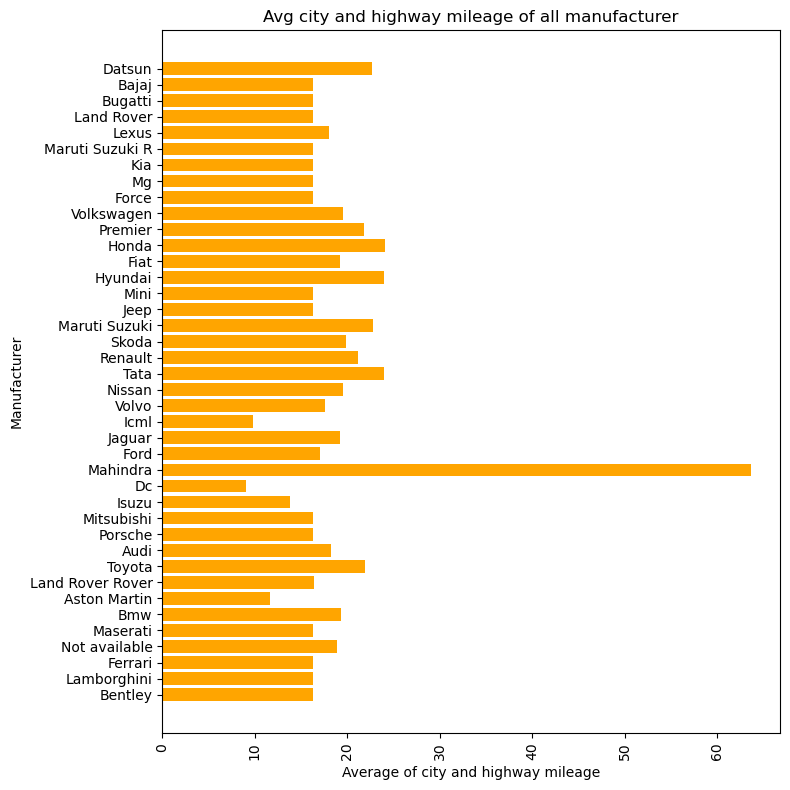

In [247]:
plt.figure(figsize=(8,8))
plt.barh(sorting['Make'],sorting['Avg_mileage'],color='orange')
plt.xticks(rotation=90)
plt.title('Avg city and highway mileage of all manufacturer')
plt.ylabel('Manufacturer')
plt.xlabel('Average of city and highway mileage')
plt.tight_layout()  #adjust the overlapping.
plt.show()
#Displayed using horizontal bar chart.

In [285]:
#Task-8 Plot the line chart to understand the relationship between displacement and city mileage by choosing top 10 cars with highest city mileage
#What do you infer from this graph?Are there any unusual observations? if yes how would you resolve this:

filter=car.sort_values(by='City_Mileage_km_litre',ascending=False)[['Model','Displacement','City_Mileage_km_litre']][:10]
filter

,Model,Displacement,City_Mileage_km_litre
688,E Verito,72.000000,110.0
689,E Verito,72.000000,110.0
687,E Verito,72.000000,110.0
616,E2O Plus,1858.804589,80.0
615,E2O Plus,1858.804589,80.0
160,Dzire,1248.000000,28.4
157,Dzire,1248.000000,28.4
166,Dzire,1248.000000,28.4
165,Dzire,1248.000000,28.4
164,Dzire,1248.000000,28.4


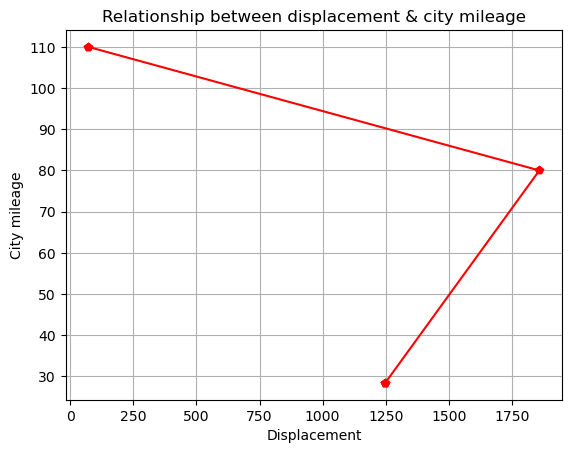

In [287]:
plt.plot(filter['Displacement'],filter['City_Mileage_km_litre'],color='red',marker='p')
plt.title('Relationship between displacement & city mileage')
plt.xlabel('Displacement')
plt.ylabel('City mileage')
plt.grid()
plt.show()

#Interpretation:
#Under this task I has observed that the line chart for displacement is higher than city mileage.

In [365]:
#Task-9 Analyze the spread of fuel economy using histogram for all car models?Which 'Make' is most skewed mileage distribution with a separate histogram:
pvt=pd.pivot_table(car,index=['Make'],values=['City_Mileage_km_litre'])
Hyundai=pvt.loc['Hyundai']
Suzuki=pvt.loc['Maruti Suzuki']
Tata=pvt.loc['Tata']
Bmw=pvt.loc['Bmw']
print(Hyundai)
print(Suzuki)
print(Tata)
print(Bmw) 

City_Mileage_km_litre    16.017
Name: Hyundai, dtype: float64
City_Mileage_km_litre    18.85443
Name: Maruti Suzuki, dtype: float64
City_Mileage_km_litre    17.1829
Name: Tata, dtype: float64
City_Mileage_km_litre    14.596757
Name: Bmw, dtype: float64


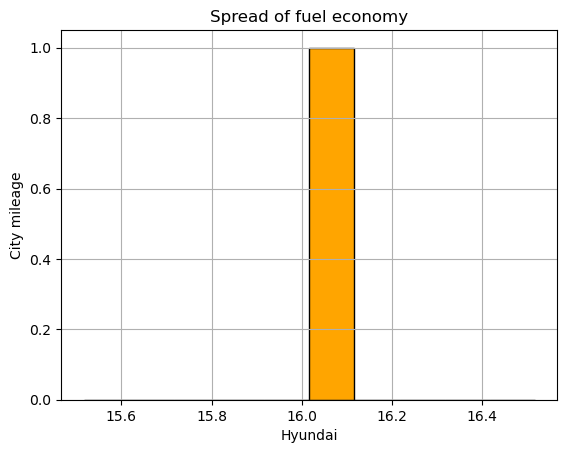

In [369]:
plt.hist(Hyundai,color='orange',edgecolor='black')
plt.title('Spread of fuel economy')
plt.xlabel('Hyundai')
plt.ylabel('City mileage')
plt.grid()
plt.show()

#Interpretation:
#Under this task Hyundai is the second most skewed mileage distribution.

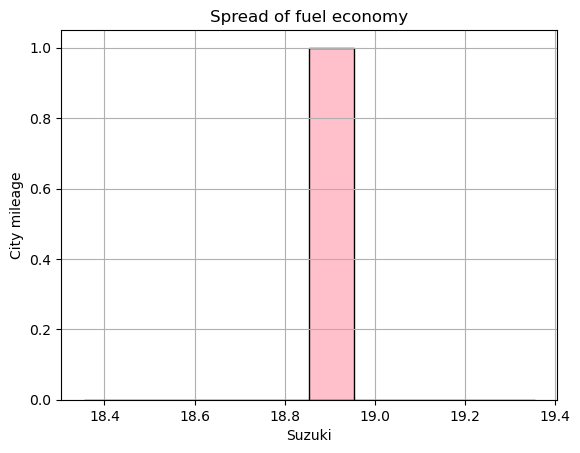

In [379]:
plt.hist(Suzuki,color='pink',edgecolor='black')
plt.title('Spread of fuel economy')
plt.xlabel('Suzuki')
plt.ylabel('City mileage')
plt.grid()
plt.show()

#Interpretation:
#Under this task Suzuki is the most(first) skewed mileage distribution.

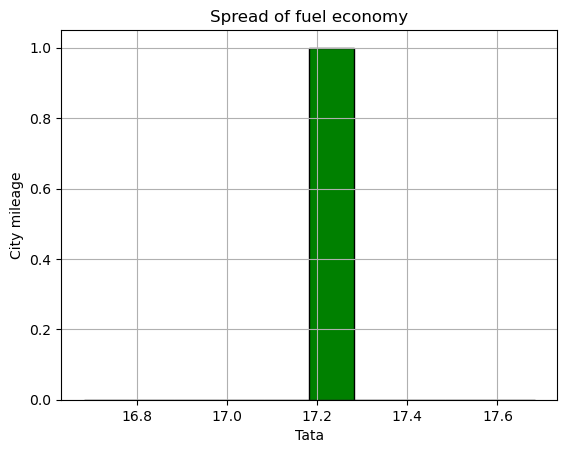

In [381]:
plt.hist(Tata,color='green',edgecolor='black')
plt.title('Spread of fuel economy')
plt.xlabel('Tata')
plt.ylabel('City mileage')
plt.grid()
plt.show()

#Interpretation:
#Under this task Tata is the fourth most skewed mileage distribution.

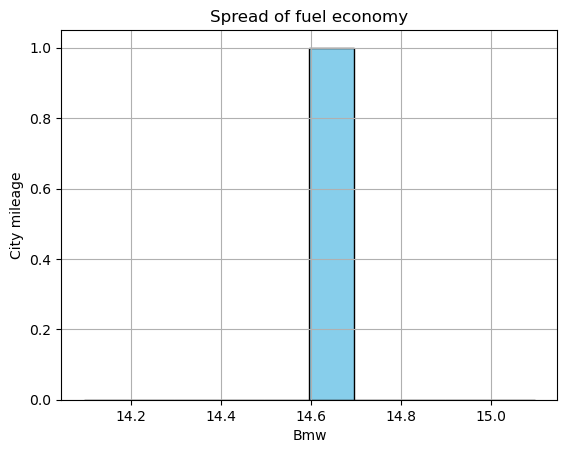

In [383]:
plt.hist(Bmw,color='skyblue',edgecolor='black')
plt.title('Spread of fuel economy')
plt.xlabel('Bmw')
plt.ylabel('City mileage')
plt.grid()
plt.show()

#Interpretation:
#Under this task bmw is the third most skewed mileage distribution.

In [726]:
#Task-10 Create a another dataframe and do missing value treatment:
new=car.copy()

In [728]:
new.isnull().sum()
#Interpretation:
#Under this task I identified there is no missing values in these columns.

S. No.                            0
Make                              0
Model                             0
Variant                           0
Displacement                      0
Cylinders                         0
Valves_Per_Cylinder               0
Fuel_Tank_Capacity_litre          0
Fuel_Type                         0
Height_mm                         0
Length_mm                         0
Width_mm                          0
Body_Type                         0
Doors                             0
City_Mileage_km_litre             0
Highway_Mileage_km_litre          0
Kerb_Weight                       0
Power                             0
Torque                            0
Seating_Capacity                  0
Central_Locking                   0
Child_Safety_Locks                0
Hill_Assist                       0
Drive_Modes                       0
High_Speed_Alert_System           0
ABS_(Anti-lock_Braking_System)    0
Gross_Vehicle_Weight              0
Airbags                     

In [730]:
new.dtypes

#Interpretation:
#Under this task I was already done a preprocessing before task-1. so thats why there is no missing values.

S. No.                              int64
Make                               object
Model                              object
Variant                            object
Displacement                      float64
Cylinders                         float64
Valves_Per_Cylinder               float64
Fuel_Tank_Capacity_litre          float64
Fuel_Type                          object
Height_mm                         float64
Length_mm                         float64
Width_mm                          float64
Body_Type                          object
Doors                             float64
City_Mileage_km_litre             float64
Highway_Mileage_km_litre          float64
Kerb_Weight                        object
Power                             float64
Torque                            float64
Seating_Capacity                  float64
Central_Locking                    object
Child_Safety_Locks                 object
Hill_Assist                        object
Drive_Modes                       

In [732]:
#Task-11 Remove the 'kg' and all other objects and convert into float furthermore multiple with pounds=2.2:
new['Kerb_Weight']=new['Kerb_Weight'].str.replace(r"kg",'')

In [734]:
new['Gross_Vehicle_Weight']=new['Gross_Vehicle_Weight'].str.replace(r"kg",'')

In [736]:
new['Kerb_Weight']=new['Kerb_Weight'].str.replace(r"-",'')

In [738]:
new['Gross_Vehicle_Weight']=new['Gross_Vehicle_Weight'].str.replace(r"â€¯ ",'')

In [740]:
new['Gross_Vehicle_Weight']=new['Gross_Vehicle_Weight'].replace(['NA '],100.50)

In [742]:
new=new.astype({'Kerb_Weight':float})

In [744]:
new=new.astype({'Gross_Vehicle_Weight':float})

In [746]:
new.dtypes

S. No.                              int64
Make                               object
Model                              object
Variant                            object
Displacement                      float64
Cylinders                         float64
Valves_Per_Cylinder               float64
Fuel_Tank_Capacity_litre          float64
Fuel_Type                          object
Height_mm                         float64
Length_mm                         float64
Width_mm                          float64
Body_Type                          object
Doors                             float64
City_Mileage_km_litre             float64
Highway_Mileage_km_litre          float64
Kerb_Weight                       float64
Power                             float64
Torque                            float64
Seating_Capacity                  float64
Central_Locking                    object
Child_Safety_Locks                 object
Hill_Assist                        object
Drive_Modes                       

In [748]:
pound_kerb=2.2
multiple=new.Kerb_Weight*pound_kerb
multiple

0       1452.0
1       1595.0
2       1562.0
3       1595.0
4       1595.0
         ...  
1271    2574.0
1272    2585.0
1273    2435.4
1274    2376.0
1275    5137.0
Name: Kerb_Weight, Length: 1276, dtype: float64

In [750]:
pound_kerb=2.2
multiple1=new.Gross_Vehicle_Weight*pound_kerb
multiple1
#Interpretation:
#Under this task I has changed multipled with pounds for both the columns(Gross_Vehicle_Weight,Kerb_Weight).

0       5522.0
1       5522.0
2       5522.0
3       5522.0
4       5522.0
         ...  
1271    3399.0
1272    3410.0
1273    3260.4
1274    3201.0
1275    6842.0
Name: Gross_Vehicle_Weight, Length: 1276, dtype: float64

In [58]:
#Performance Comparison:
#Task-12 Compare the performance of 'Displacement', 'Cylinders', 'Valves_Per_Cylinder'& calculate the mean,median,std,cv for each manufacturer:
measure=car.groupby('Make')[['Displacement', 'Cylinders', 'Valves_Per_Cylinder']]
mean=measure.mean()
median=measure.median()
std=measure.std()
cv=(measure.std()/measure.mean())*100
print('Mean:',mean)
print('=============================================')
print('Median:',median)
print('=============================================')
print('Standard deviation:',std)
print('=============================================')
print('Coefficient of variance:',cv)

#Interpretation:
#Under this task I has used groupby to display the mean,median,std,cv for each manufacturer.

Mean:                   Displacement  Cylinders  Valves_Per_Cylinder
Make                                                          
Aston Martin       5038.333333  10.666667             4.000000
Audi               2256.354839   5.161290             4.774194
Bajaj               216.000000   4.000000             1.000000
Bentley            5447.833333  10.666667             4.000000
Bmw                2707.918919   5.459459             4.000000
Bugatti            7993.000000  16.000000             4.000000
Datsun             1065.066667   3.000000             4.000000
Dc                 2000.000000   4.000000             4.000000
Ferrari            4589.500000   8.500000             4.000000
Fiat               1269.391304   4.000000             4.000000
Force              2447.000000   4.000000             4.000000
Ford               1551.325581   3.883721             4.000000
Honda              1444.875000   4.000000             4.000000
Hyundai            1354.467728   3.938462        

In [246]:
#Task-13 Identify atleast 3 features that affect mileage(using correlation analysis) for the manufacturers:Renault,Toyota,Honda.
new1=car.copy()
data=new1[['Make','Highway_Mileage_km_litre','City_Mileage_km_litre']]

filter=data[data['Make'].isin(['Honda','Toyota','Renault'])][['Make','Highway_Mileage_km_litre','City_Mileage_km_litre']]
filter

data=filter.groupby('Make')[['Highway_Mileage_km_litre','City_Mileage_km_litre']]
correlation1=data.corr()
correlation1

Highway_Mileage_km_litre  \
Make                                                         
Honda   Highway_Mileage_km_litre                  1.000000   
        City_Mileage_km_litre                     0.499008   
Renault Highway_Mileage_km_litre                  1.000000   
        City_Mileage_km_litre                     0.179753   
Toyota  Highway_Mileage_km_litre                  1.000000   
        City_Mileage_km_litre                     0.855050   

                                  City_Mileage_km_litre  
Make                                                     
Honda   Highway_Mileage_km_litre               0.499008  
        City_Mileage_km_litre                  1.000000  
Renault Highway_Mileage_km_litre               0.179753  
        City_Mileage_km_litre                  1.000000  
Toyota  Highway_Mileage_km_litre               0.855050  
        City_Mileage_km_litre                  1.000000

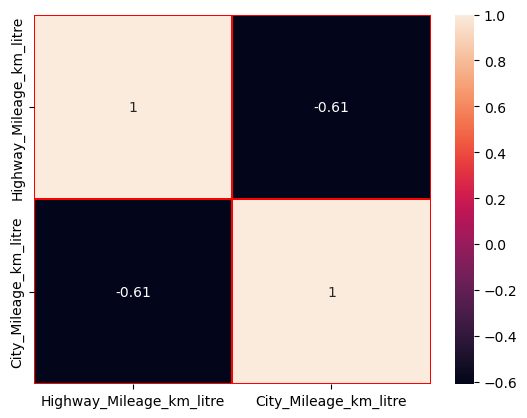

In [248]:
sns.heatmap(correlation1.corr(),annot=True,linecolor='red',linewidths=.25)
plt.show()
#Interpretation:
#Under this task I has fetched the record of 'Make' and then displayed the city and highway mileage using groupby('Make' wise city and highway mileage).
#I has identified some negative correlation and positive correlation in this by the dark shade and light shade of the line.
#Thus there is a negative correlation.

In [769]:
#Weight Distribution study:
#Task-14 Calculate 'Make' wise mean,median,std,cv for the Kerb weight and gross vehicle weight:
new1=car.copy()

In [771]:
new1['Kerb_Weight']=new1['Kerb_Weight'].str.replace(r"kg",'')

In [773]:
new1['Gross_Vehicle_Weight']=new1['Gross_Vehicle_Weight'].str.replace(r"kg",'')

In [775]:
new1['Kerb_Weight']=new1['Kerb_Weight'].str.replace(r"-",'')

In [777]:
new1['Gross_Vehicle_Weight']=new1['Gross_Vehicle_Weight'].str.replace(r"â€¯ ",'')

In [779]:
new1['Gross_Vehicle_Weight']=new1['Gross_Vehicle_Weight'].replace(['NA '],100.50)

In [781]:
new1=new1.astype({'Kerb_Weight':float})

In [783]:
new1=new1.astype({'Gross_Vehicle_Weight':float})

In [785]:
new1.dtypes

S. No.                              int64
Make                               object
Model                              object
Variant                            object
Displacement                      float64
Cylinders                         float64
Valves_Per_Cylinder               float64
Fuel_Tank_Capacity_litre          float64
Fuel_Type                          object
Height_mm                         float64
Length_mm                         float64
Width_mm                          float64
Body_Type                          object
Doors                             float64
City_Mileage_km_litre             float64
Highway_Mileage_km_litre          float64
Kerb_Weight                       float64
Power                             float64
Torque                            float64
Seating_Capacity                  float64
Central_Locking                    object
Child_Safety_Locks                 object
Hill_Assist                        object
Drive_Modes                       

In [787]:
new1=new1.groupby('Make')[['Kerb_Weight','Gross_Vehicle_Weight']]
mean=new1.mean()
median=new1.median()
std=new1.std()
cv=(new1.std()/new1.mean())*100
print('Mean:',mean)
print('=============================================')
print('Median:',median)
print('=============================================')
print('Standard deviation:',std)
print('=============================================')
print('Coefficient of variance:',cv)

#Interpretation:
#First I has changed the datatype into float and then calculated all.
#Under this task I used groupby to find the 'Make' wise mean,median,std,cv.

Mean:                    Kerb_Weight  Gross_Vehicle_Weight
Make                                                
Aston Martin      1.733333e+03           2367.000000
Audi              1.810000e+03           2298.225806
Bajaj             1.785000e+03           2510.000000
Bentley           2.457833e+03           3065.666667
Bmw               1.745865e+03           2414.864865
Bugatti           1.995000e+03           2510.000000
Datsun            1.232400e+03           2510.000000
Dc                1.580000e+03           1580.000000
Ferrari           1.633750e+03           2510.000000
Fiat              1.251739e+03           2241.086957
Force             1.785000e+03           2598.333333
Ford              2.888213e+06           2278.720930
Honda             1.142312e+03           1893.906250
Hyundai           1.541700e+03           2142.046154
Icml              1.717636e+03           2473.636364
Isuzu             1.877000e+03           2392.000000
Jaguar            1.741409e+03          